In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
import xgboost as xgb
XGB = xgb.XGBClassifier()
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [3]:
df = pd.read_csv(r'C:\Users\Seba\Documents\python\datasets pyth\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# standaryzacja time and amount
robust = RobustScaler()
df['Scaled_Amount'] = robust.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time'] = robust.fit_transform(df['Time'].values.reshape(-1,1))
Scaled_Amount = df['Scaled_Amount']
Scaled_Time = df['Scaled_Time']
df.drop(['Time','Amount'],axis=1,inplace=True)


In [5]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the dataset')
X = df.drop('Class', axis=1)
y=df['Class']


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
#resampling
number_record_fraud = len(df[df['Class']==1])
fraud_indices = np.array(df[df['Class']==1].index)

normal_indices = np.array(df[df['Class']==0].index)
random_normal_indices = np.random.choice(normal_indices,number_record_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
sample_indices = np.concatenate([random_normal_indices,fraud_indices])
sample_data = df.iloc[sample_indices]
X_sample = sample_data.drop('Class', axis=1).values
y_sample= sample_data['Class'].values


print("Percentage of normal transactions: ", len(sample_data[sample_data.Class == 0])/len(sample_data))
print("Percentage of fraud transactions: ", len(sample_data[sample_data.Class == 1])/len(sample_data))
print('Total number of transactions in resampled data', len(sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data 984


In [8]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample,y_sample,test_size = 0.3,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_sample))
print("Number transactions test dataset: ", len(X_test_sample))
print("Total number of transactions: ", len(X_train_sample)+len(X_test_sample))                                                                                
                                                                                



Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


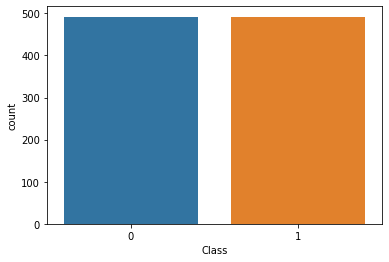

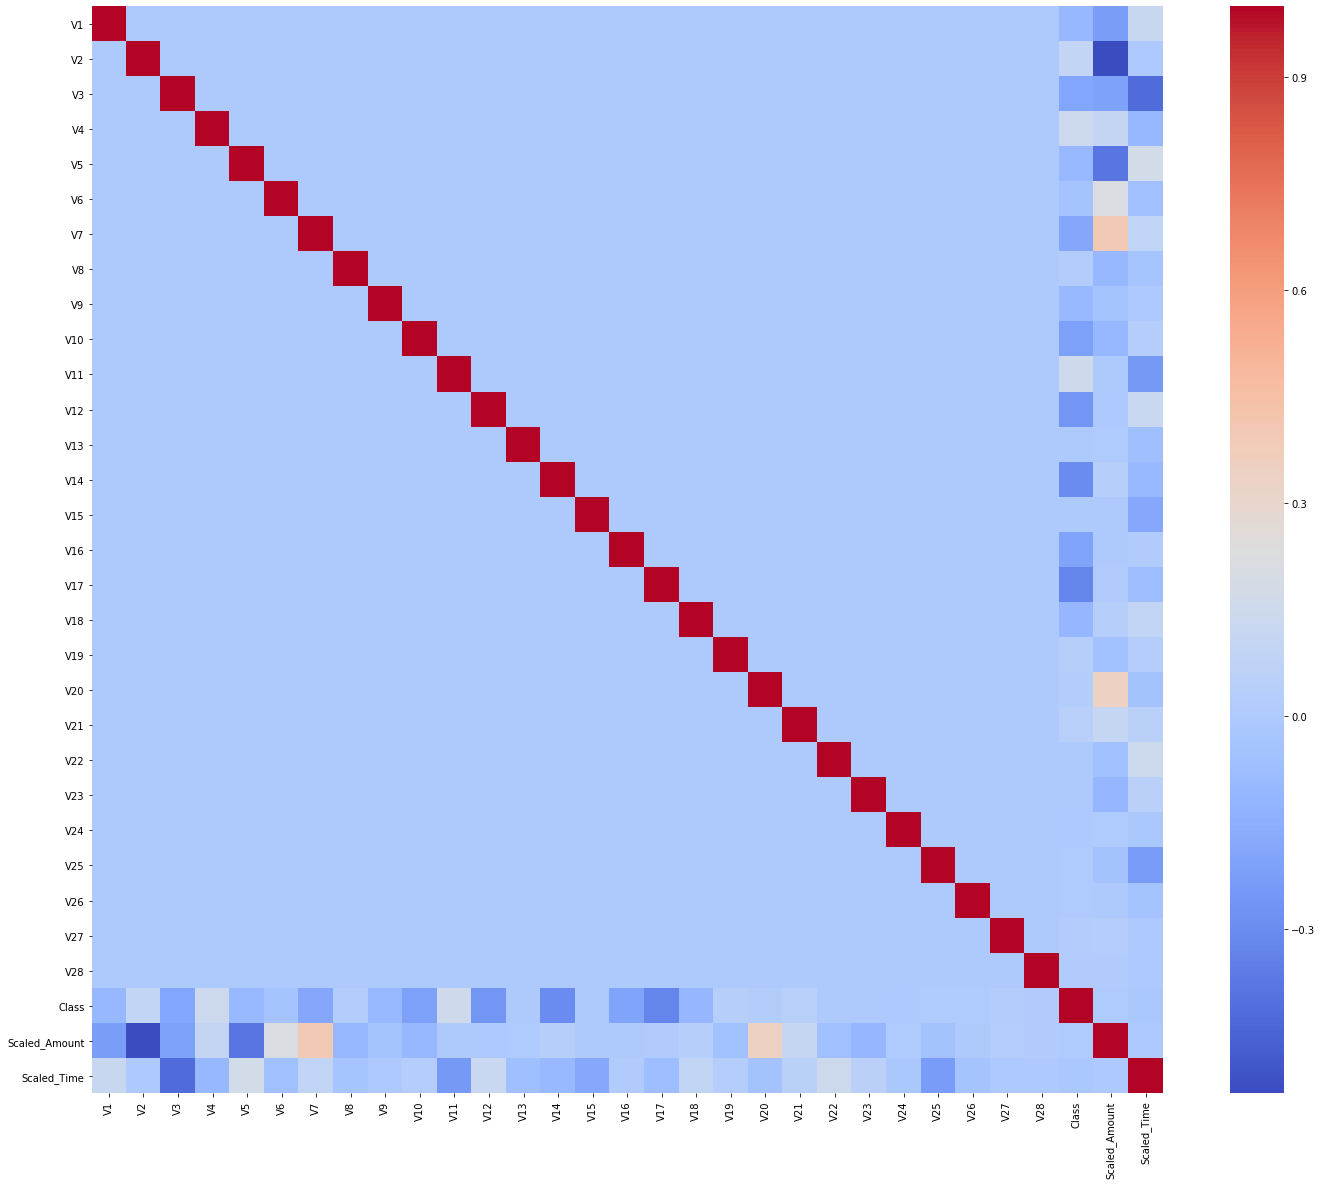

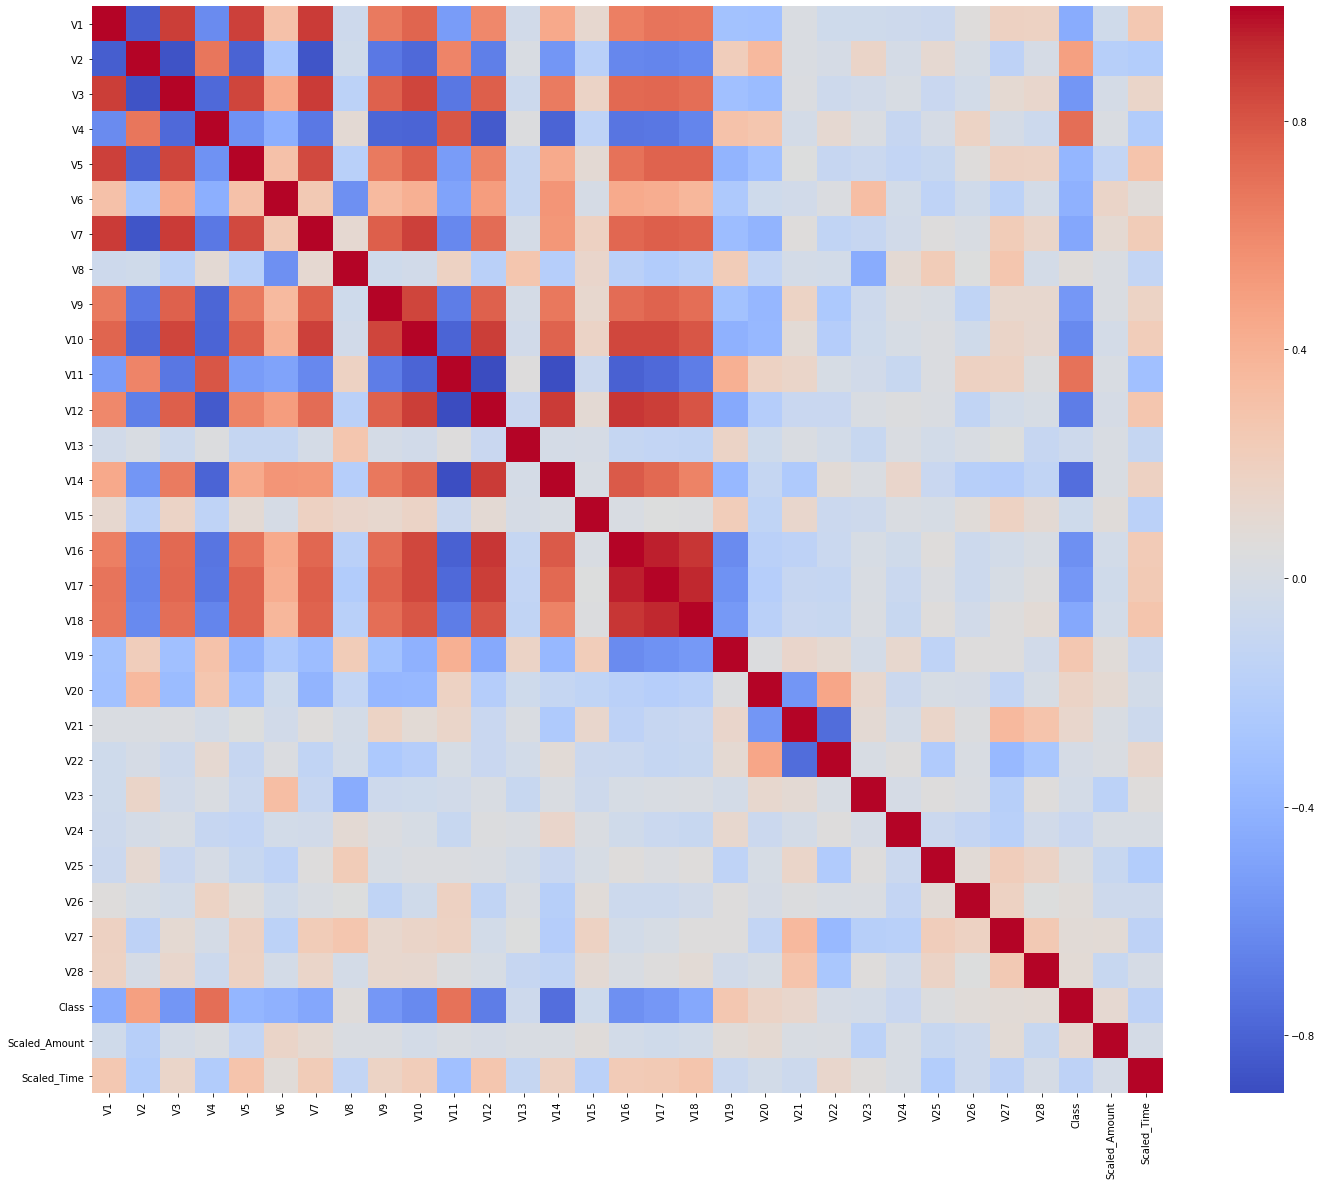

In [12]:
sample_data['Class'].value_counts()/len(sample_data)
sns.countplot(x='Class', data= sample_data)
plt.subplots(figsize=(24,20))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.subplots(figsize=(24,20))
sns.heatmap(sample_data.corr(),cmap='coolwarm')

In [42]:
#predictions
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
acc1 = accuracy_score(y_test, LR_pred)
print("Logistic Regression Accuracy= ", np.round(acc1,3))
#sample
LR.fit(X_train_sample,y_train_sample)
LR_pred2 = LR.predict(X_test_sample)
acc2 = accuracy_score(y_test_sample, LR_pred2)
print("Logistic Regression Sample Accuracy= ", np.round(acc2,3))
#dtree
dtree.fit(X_train_sample,y_train_sample)
dtree_pred = dtree.predict(X_test_sample)
acc3 = accuracy_score(y_test_sample, dtree_pred)
print("Dtree Sample Accuracy= ", np.round(acc3,3))
#randomforest
rfc.fit(X_train_sample, y_train_sample)
rfc_pred = rfc.predict(X_test_sample)
acc4= accuracy_score(y_test_sample, rfc_pred)
print("RFC Sample Accuracy= ", np.round(acc4,3))
#Xgboost
XGB.fit(X_train_sample,y_train_sample)
XGB_pred = XGB.predict(X_test_sample)
acc5 = accuracy_score(y_test_sample, XGB_pred)
print("XGB Sample Accuracy= ", np.round(acc5,3))

Logistic Regression Accuracy=  0.999
Logistic Regression Sample Accuracy=  0.932
Dtree Sample Accuracy=  0.909
RFC Sample Accuracy=  0.926
XGB Sample Accuracy=  0.943


In [20]:
print(classification_report(y_test, LR_pred))
print(confusion_matrix(y_test, LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    12]
 [   56    91]]


In [31]:
print(classification_report(y_test_sample,rfc_pred))
print(confusion_matrix(y_test_sample,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       147
           1       0.98      0.89      0.93       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

[[144   3]
 [ 16 133]]


In [43]:
print(classification_report(y_test_sample,XGB_pred))
print(confusion_matrix(y_test_sample,XGB_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.97      0.91      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

[[143   4]
 [ 13 136]]


In [ ]:
print(classification_report(y_test_sample,LR_pred2))
print(confusion_matrix(y_test_sample,LR_pred2))

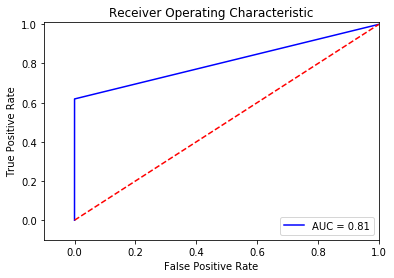

In [25]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),LR_pred)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

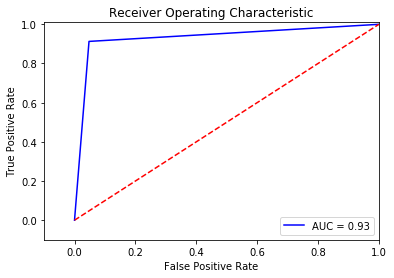

In [28]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test_sample.ravel(),LR_pred2)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

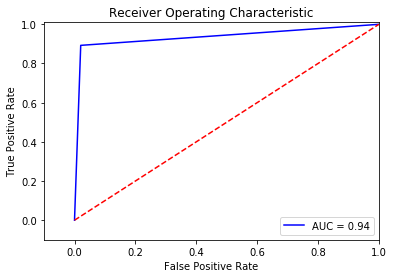

In [32]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test_sample.ravel(),rfc_pred)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

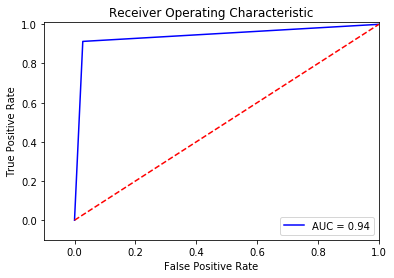

In [44]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test_sample.ravel(),XGB_pred)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()